# Intro to D4M Associative Arrays

Didplay Matlab D4M help pages.

In [3]:
%% Add D4M to Path
addpath('../../matlab_src')

help D4M

'D4M' is a script from the file /Users/Lauren/Documents/SoftwareAndPackages/d4m/matlab_src/D4M.m


D4M: DYNAMIC DISTRIBUTED DIMENSIONAL DATA MODEL

 
 D4M is a library of functions that allow row, column and value triples of strings and/or numbers
 to be formed into associative arrays and manipulated using linear algebra.  These triples
 can be inserted into and queried from database tables.
 The functions summarized below consist of User, Utility and Internal functions.
 User functions are intended to be used by users.  Utility functions are less commonly used by users.
 Internal functions are not intended to be used by users.


QUICK INSTALL

  (1) Unpack d4m software.
  (2) Add the d4m_api/matlab_src to your path, e.g.
	 addpath /home/kepner/d4m_api/matlab_src
  (3) Start matlab and type "help D4M" to see this page
  (4) Type "help function_name" to see more detailed documentation
  (5) Look at the material in d4m_api/docs and d4m_api/examples
  (6) If you are going to be using D4M 


  Utility Functions:
    StrSearch: Finds index location of one string inside another.
    StrSepsame: Makes separators in two lists of strings the same.
    StrSubind: Returns sub-strings i found in string list s.
    StrSubsref: Returns index locations of one list of strings inside another.
    StrUnique: Finds unique strings in string array and index mapping between input and output.

    Mertonize: DEPRECATED. Interleave the values of two decimal strings.
    MertonizeLatLon: DEPRECATED. Interleave the values of two decimal strings.

  Internal Functions (not user functions):


IO

  User Functions:
    StrLS: Returns list of files in a directory formatted as a string list.

    Assoc2CSV: Writes an associative array to a CSV file.
    Assoc2CSVstr: Converts an associative array to a CSV string.
    Assoc2JSONCSV: Converts an associative array to a JSON formatted CSV string.
    FindCSVsimple: Fast read of a CSV (or TSV) file into simple triples.
    FindCSV: Reads a CSV (or TSV) 

## Create, Display, Save an Associative Array

Create lists of row, column, and values substrings. Note: the last character in the string is the divider. It can be any character. Common choices are ",", " ", tab, and newline.

In [2]:
row = 'a,a,a,a,a,a,a,aa,aaa,b,bb,bbb,a,aa,aaa,b,bb,bbb,';
column = 'a,aa,aaa,b,bb,bbb,a,a,a,a,a,a,a,aa,aaa,b,bb,bbb,';
values = 'a-a,a-aa,a-aaa,a-b,a-bb,a-bbb,a-a,aa-a,aaa-a,b-a,bb-a,bbb-a,a-a,aa-aa,aaa-aaa,b-b,bb-bb,bbb-bbb,';

Create an associtavie array, A, from row, column, and values.

In [3]:
A = Assoc(row,column,values);

Display the associative array in tabular form.

In [4]:
displayFull(  A  );

    a,    aa,   aaa,    b,  bb,   bbb,    
a,  a-a,  a-aa, a-aaa,  a-b,a-bb, a-bbb,  
aa, aa-a, aa-aa,                          
aaa,aaa-a,      aaa-aaa,                  
b,  b-a,                b-b,              
bb, bb-a,                   bb-bb,        
bbb,bbb-a,                        bbb-bbb,


Convert values to 0 and 1.

In [5]:
displayFull(  Abs0(A)  );

    a,aa,aaa,b,bb,bbb,
a,  1,1, 1,  1,1, 1,  
aa, 1,1,              
aaa,1,   1,           
b,  1,       1,       
bb, 1,         1,     
bbb,1,            1,  


Save associative array to a CSV file.

In [6]:
Assoc2CSV(A,char(10),',','data/A.csv');

## Read and Select Sub Associative Arrays

Read CSV file into an associative array.

In [7]:
A = ReadCSV('data/A.csv');

Select a subset of rows.

In [8]:
displayFull(  A('a,b,',:)  );

  a,  aa,  aaa,  b,  bb,  bbb,  
a,a-a,a-aa,a-aaa,a-b,a-bb,a-bbb,
b,b-a,           b-b,           


Convert values to 0 and 1.

In [9]:
displayFull(  Abs0(A('a,b,',:))  );

  a,aa,aaa,b,bb,bbb,
a,1,1, 1,  1,1, 1,  
b,1,       1,       


Select a subset of columns.

In [10]:
displayFull(  A(:,'a,b,')  );

    a,    b,  
a,  a-a,  a-b,
aa, aa-a,     
aaa,aaa-a,    
b,  b-a,  b-b,
bb, bb-a,     
bbb,bbb-a,    


Convert values to 0 and 1.

In [11]:
displayFull(  Abs0(A(:,'a,b,'))  );

    a,b,
a,  1,1,
aa, 1,  
aaa,1,  
b,  1,1,
bb, 1,  
bbb,1,  


# Analyze Entities in News Articles

Load entities from 10,000 news articles and print the first few rows.

In [12]:
A = ReadCSV('data/entity.csv');

displayFull(  A(1:5,:)  );

      doc,                entity,     position,   type,    
1,    19960825_13108.txt, addis ababa,54;132;974;,LOCATION,
10,   19960821_6808.txt,  aden,       212;,       LOCATION,
100,  19960902_27945.txt, africa,     730;1176;,  LOCATION,
1000, 19961031_156588.txt,argentina,  1;12;419;,  LOCATION,
10000,19961017_122599.txt,greensboro, 41;,        LOCATION,


Show dimensions and number entries of A.

In [3]:
disp( [size(A),nnz(A)] );

    47089        4   188356


Plot transpose of the dense data.

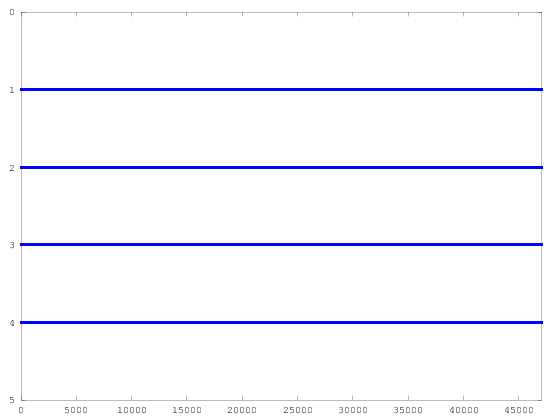

In [13]:
spy(  transpose(A)  )

## Construct and Display a Sparse Associative Array of the Data

Grab doc, entity, position, and type columns and combine type and entity with '|' seperator.

In [15]:
[row col doc]      = A(:,'doc,');              % Get doc column.
[row col entity]   = A(:,'entity,');           % Get entity column.
[row col position] = A(:,'position,');         % Get position column.
[row col type]     = A(:,'type,');             % Get type column.
typeEntity = CatStr(type,'|',entity);          % Interleave type and entity strings.

Create a sparse associative array of all the data and plot a few row.

In [16]:
E = Assoc(doc,typeEntity,position);

In [17]:
disp( [size(E), nnz(E)]  );

    9974    3657   47089


Plot transpose of the sparse data.

ans =  47089


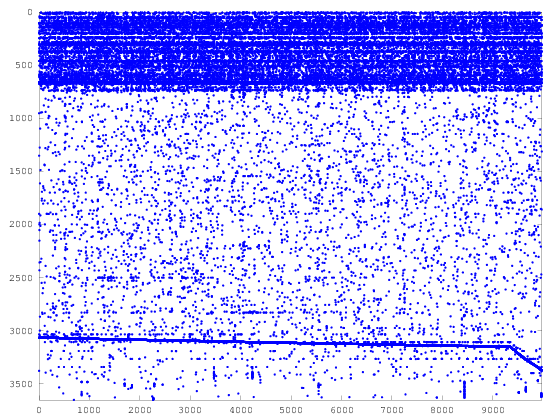

In [18]:
spy(  transpose(E)  );

nnz(E)

## Analyze Relationships

Define relationships to examine.

In [9]:
p = 'PERSON|michael chang,';
P = StartsWith('PERSON|,');
L = StartsWith('LOCATION|,');

Show all people mentioned in news articles with "p".

In [10]:
pFriend = Col(E(Row(E(:,p)),P))

pFriend = PERSON|alex obrien,PERSON|amy frazier,PERSON|ann hobbs,PERSON|byron black,PERSON|javier sanchez,PERSON|jonathan stark,PERSON|lindsay davenport,PERSON|mary joe fernandez,PERSON|michael chang,PERSON|michael joyce,PERSON|todd martin,PERSON|virginia wade,


Show the most common locations associated with the friends of "p".

In [14]:
sum(  E(:,pFriend).' * E(:,L)  ,1) <5

(1,LOCATION|argentina,)     1
(1,LOCATION|canada,)     1
(1,LOCATION|chile,)     3
(1,LOCATION|denmark,)     1
(1,LOCATION|ecuador,)     1
(1,LOCATION|france,)     4
(1,LOCATION|italy,)     1
(1,LOCATION|madagascar,)     1
(1,LOCATION|monaco,)     2
(1,LOCATION|netherlands,)     3
(1,LOCATION|norway,)     1
(1,LOCATION|paris,)     1
(1,LOCATION|singapore,)     2
(1,LOCATION|toronto,)     1
(1,LOCATION|ukraine,)     3
(1,LOCATION|virginia,)     3
(1,LOCATION|washington,)     1


Do it all in 1 line of code.

In [22]:
sum(  E(:,Col(E(Row(E(:,p)),P))).' * E(:,L)  ,1) > 15

(1,LOCATION|croatia,)     19
(1,LOCATION|germany,)     16
(1,LOCATION|spain,)     23
(1,LOCATION|united states,)     22


Scale to multiple people at once.

In [23]:
p = 'PERSON|michael chang,PERSON|don king,PERSON|james joyce,';
sum(  E(:,Col(E(Row(E(:,p)),P))).' * E(:,L)  ,1) > 15

(1,LOCATION|britain,)     19
(1,LOCATION|croatia,)     19
(1,LOCATION|germany,)     19
(1,LOCATION|new york,)     21
(1,LOCATION|spain,)     23
(1,LOCATION|united states,)     29


# Analyze DNA Data

Read in bacteria reference DNA and palm sample DNA data into an associative arrays.

In [24]:
DNAwordsize = 10;
Eref = SplitSequenceCSV('data/bacteria.csv',DNAwordsize);
Esamp = SplitSequenceCSV('data/palm.csv',DNAwordsize);

Perform BLAST DNA sequeance analysis in 1 line of code to find best bacteria match.

In [25]:
sum( Eref * Esamp.' ,2) > 20

(AB002518.1_1-1416,,1)     22
(AB002522.1_1-1416,,1)     22
(AB002523.1_1-1496,,1)     22
(AB002525.1_1-1457,,1)     22
(AB002639.1_1-1384,,1)     309
(AB003189.1_1-1515,,1)     27
(AB003386.1_1-1427,,1)     29
(AB003388.1_1-1373,,1)     29


# Analyze Network Data

Read in 80,000 simulated network traffic logs from 1 day and print the first few rows.

In [6]:
A = ReadCSV('data/network.csv');

displayFull(  A(1:5,:)  );

      dest,           src,           time,    
1,    126.209.158.242,139.143.28.239,09:14:48,
10,   168.45.199.53,  233.109.159.60,14:21:01,
100,  140.237.216.204,89.232.134.186,07:56:27,
1000, 250.100.174.193,96.211.41.46,  23:35:01,
10000,45.240.76.78,   164.40.220.138,14:51:57,


Make data sparse and show dimensions and number of entries.

In [7]:
E = val2col(A,'|');

disp( [size(E),nnz(E)] )

    84078    90170   252234


Select fields and time windows to explore.

In [8]:
S = StartsWith('src|,');         T1 = StartsWith('time|01:,');
D = StartsWith('dest|,');        T2 = StartsWith('time|05:,');

E1 = E(Row(E(:,T1)),:);          % Data from time window 1.
E2 = E(Row(E(:,T2)),:);          % Data from time winod 2.

Create adjacency array of network traffic in each time window.

In [9]:
A1 = E1(:,S).' * E1(:,D);
A2 = E2(:,S).' * E2(:,D);

Find source/destination pairs that are common to both time windows.

In [10]:
A1 .* A2

(src|255.185.129.139,,dest|154.229.44.255,)     1
(src|37.83.177.240,,dest|166.35.18.237,)     1
(src|170.228.83.128,,dest|17.229.56.231,)     1
(src|37.83.177.240,,dest|212.222.89.137,)     1
(src|148.216.161.224,,dest|228.176.163.152,)     1
(src|37.83.177.240,,dest|231.100.65.139,)     1
(src|255.185.129.139,,dest|236.67.214.2,)     1
(src|73.223.154.81,,dest|29.153.177.89,)     1
(src|170.228.83.128,,dest|30.130.66.174,)     1
(src|117.46.146.238,,dest|45.240.76.78,)     2
(src|8.207.64.17,,dest|50.61.226.45,)     1
(src|170.228.83.128,,dest|98.198.16.104,)     1
